# Module 11 Challenge Deliverable 2

## Scraping the Data

In [25]:
# Import Libraries

from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd

In [26]:
# Set up Splinter

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [27]:
# Set to the Mars homepage

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [28]:
# Parse the HTML

html = browser.html
html_soup = soup(html, 'html.parser')

In [29]:
html_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


After reviewing the above, it appears that each of the headlines that appears on the main page has the class "content_title" and the blurb of text below it has the class "article_teaser_body".  Both have the HTML tag "div".

In [35]:
# Get the column names

columns = html_soup.find_all('th')

for column in columns:
    print(column.text)

id
terrestrial_date
sol
ls
month
min_temp
pressure


In [53]:
# Create data frame and add these as columns
column_names = []

for column in columns:
    column_names.append(column.text)

print(column_names)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [51]:
# Check to see if the titles can be scraped

rows = html_soup.find_all('td')

#Using the strip function
for row in rows:
    print(row.text.strip())

2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6
-75.0
753.0
1

There are seven columns and the values can be entered into the columns from 1st to 7th, left to right, and then go to the next row.

In [60]:
results_list = []
temp_list = []

# The below is built knowing that there are seven columns.  I built a for loop to go through all rows and create
# a list using row values.  When the list gets to 7 elements, it gets appended to the results list of lists and then
# I reset the temporary list

for row in rows:
    x = row.text.strip()
    temp_list.append(x)
    
    if len(temp_list) == 7:
        results_list.append(temp_list)
        temp_list = []

print(results_list)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [61]:
df = pd.DataFrame(results_list, columns = column_names)
df.head(15)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [62]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [70]:
data_types = {'id': int, 'sol': int, 'ls': int, 'month': int, 
              'min_temp': float, 'pressure':float}
df = df.astype(data_types)

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [71]:
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [72]:
df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


## Conducting the Analysis

 ### Question 1: How many months exist on Mars?
 
 We can use the describe() function to get the min and max month values:
 

In [75]:
# Import the style from Matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import dates as mdates

In [73]:
df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


**There are twelve months on Mars.** You can see the minimum month is 1 and maximum month is 12.

### Question 2: How many Martian days worth of data exist in the scraped dataset?

C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


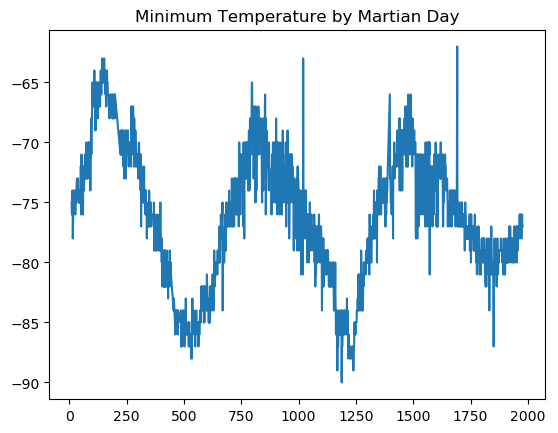

In [79]:
fig, ax = plt.subplots()

x_axis = df.sol
y_axis_temp = df.min_temp

ax.set_title('Minimum Temperature by Martian Day')

ax.plot(x_axis, y_axis_temp, label='Min. Temp.')

**Visually you can see there are about 2,000 Martian days in the dataset.** You can also see on the table for Question 1 that there are 1,977 Martian days in the data set, based on the max value since I converted the sol day to an integer.

### Question 3: What are the coldest and warmest months on Mars, using average temperature per month?

In [88]:
df_monthly = df.groupby('month').agg(['mean']).reset_index()
df_monthly.head(12)

,month,id,terrestrial_date,sol,ls,min_temp,pressure
,,mean,mean,mean,mean,mean,mean
0,1,1013.873563,2015-08-17 18:53:47.586206976,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,2015-11-26 18:12:08.089887744,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,2015-12-26 02:30:00.000000000,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,2016-02-05 07:32:47.010309376,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,2015-12-03 19:19:43.892617472,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,2014-09-16 01:18:22.040816384,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,2014-08-10 08:16:54.084507136,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,2014-10-31 18:53:37.021276672,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,2015-01-07 11:06:16.119403008,861.186567,254.052239,-69.171642,913.305970


In [105]:
df_monthly.dtypes

month                              int64
id                mean           float64
terrestrial_date  mean    datetime64[ns]
sol               mean           float64
ls                mean           float64
min_temp          mean           float64
pressure          mean           float64
dtype: object

In [126]:
df_monthly['min_temp']

,mean
0,-77.160920
1,-79.932584
2,-83.307292
3,-82.747423
4,-79.308725
5,-75.299320
6,-72.281690
7,-68.382979
8,-69.171642
9,-71.982143


<BarContainer object of 12 artists>

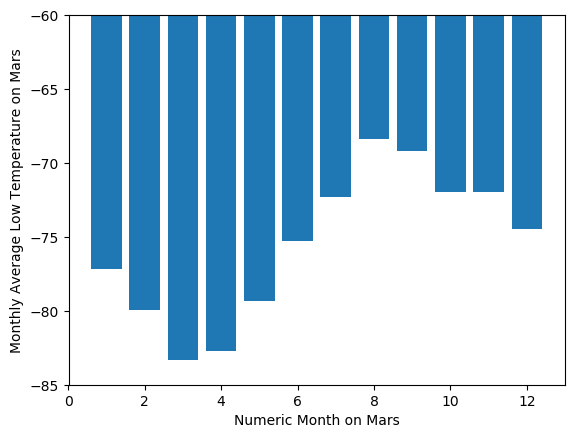

In [136]:
fig, ax = plt.subplots()

x_axis = df_monthly.month
y_axis_temp = df_monthly['min_temp'].values
y_axis = []

# Converting the temperature value array of arrays to array of values in order to plot them
for i in range(len(y_axis_temp)):
    y_axis.append(y_axis_temp[i][0])

ax.set_ylim(-85, -60)
ax.set_xlabel('Numeric Month on Mars')
ax.set_ylabel('Monthly Average Low Temperature on Mars')
ax.bar(x_axis, y_axis, label='Min. Temp.')

Visually inspecting the graph and considering the temperatures on Mars are all negative:

**1. The warmest month of the year on Mars is month #8**

**2. The coldest month of the year on Mars is month #3.**

### Question 4: What are the months with the lowest and highest atmospheric pressure?

In [137]:
df_monthly['pressure']

,mean
0,862.488506
1,889.455056
2,877.322917
3,806.329897
4,748.557047
5,745.054422
6,795.105634
7,873.829787
8,913.305970
9,887.312500


<BarContainer object of 12 artists>

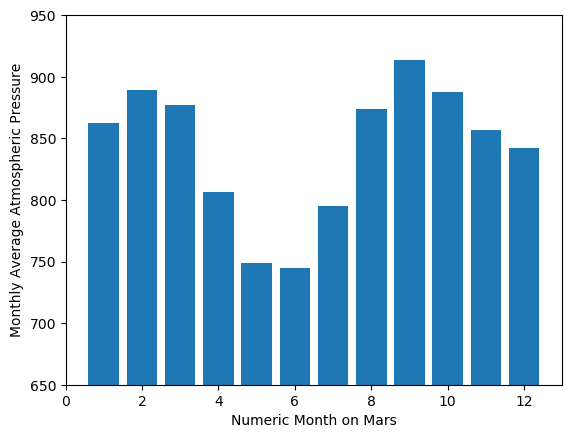

In [148]:
fig, ax = plt.subplots()

x_axis = df_monthly.month
y_axis_temp = df_monthly['pressure'].values
y_axis = []

# Converting the temperature value array of arrays to array of values in order to plot them
for i in range(len(y_axis_temp)):
    y_axis.append(y_axis_temp[i][0])

ax.set_ylim(650, 950)
ax.set_xlabel('Numeric Month on Mars')
ax.set_ylabel('Monthly Average Atmospheric Pressure')
ax.bar(x_axis, y_axis, label='Atmospheric Pressure')

Visually inspecting the graph:

**1. Month 9 has the highest atmospheric pressure on Mars.**

**2. Month 6 has the lowest atmospheric pressure on Mars.**

### Question 5: Use visualization to determine approximately how many Earth days are in a given Martian year?

<BarContainer object of 1867 artists>

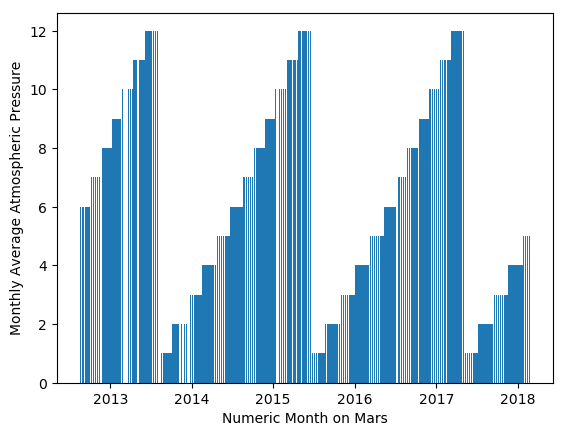

In [167]:
fig, ax = plt.subplots()

x_axis = df.terrestrial_date.values
y_axis = df.month.values

ax.set_xlabel('Date on Earth')
ax.set_ylabel('Numeric Month')
ax.bar(x_axis, y_axis, label='Atmospheric Pressure')

What I did was plot the Martian numeric month against the Earth dates to visually inspect when it changes from Mars month 12 to Mars month 1.  I then played with the set_xlim filter in the below code until I got approximately one day of the prior year or next year.  I can then take the difference of those two dates in the date filter to get the approximate Martian year length.

<BarContainer object of 1867 artists>

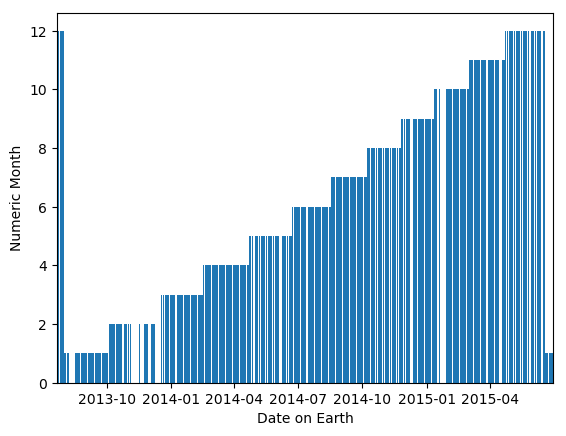

In [179]:
import datetime

fig, ax = plt.subplots()

x_axis = df.terrestrial_date.values
y_axis = df.month.values

ax.set_xlim(datetime.date(2013,7,22), datetime.date(2015,6,30))
ax.set_xlabel('Date on Earth')
ax.set_ylabel('Numeric Month')
ax.bar(x_axis, y_axis, label='Atmospheric Pressure')

In [182]:
days = datetime.date(2015,6,30)-datetime.date(2013,7,22)
print(days)

708 days, 0:00:00


**There are approximately 708 Earth days in a Martian year.**

# Export the data frame from web scraping to a CSV file.

In [183]:
df.to_csv('mars_scraped_data.csv')